In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda


# V0

In [2]:

# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}

upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
print(upstream_model)

Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8
TSTransformerEncoderCNN(
  (project_input): Linear(in_features=12, out_features=128, bias=True)
  (encoder): Linear(in_features=12, out_features=128, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-7): 8 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
    )
  )
  

/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [3]:
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')
print(downstream_model)

DownstreamInception(
  (conv1): ConvBlock(
    (conv): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,))
    (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): ConvBlock(
    (conv): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (inception3a): InceptionBlock(
    (branch1): ConvBlock(
      (conv): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
      (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch2): Sequential(
      (0): ConvBlock(
        (conv): Conv1d(128, 96, kernel_size=(1,), stride=(1,))
        (bn): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): ConvBlock(
        (conv): Conv1d(96, 128, kernel_size=(3,), stride=(1

2246929


Within epoch loss (validation) 0.53334: 100%|██████████| 416/416 [01:21<00:00,  5.09it/s]


model on GPU: True


RuntimeError: mat1 and mat2 shapes cannot be multiplied (12x450 and 12x128)

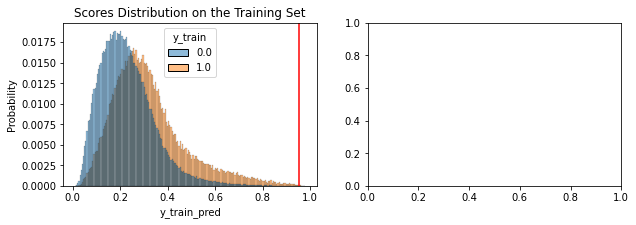

In [4]:
config = {
        # general
        'seed':123,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 10,
        'weight_decay': 0.3,
        'lr': 0.0005,
        'eval_metric':'rocauc',
        'patience':3,
        'clip':1,
        'loss_function_weight':None,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':False,
        'continue_training_upstream_model':False,
        'model_saving_path':'./combined_downstream_upstream/models/AF-V0',
        }

trainer(**config)

# V1

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 0.53333: 100%|██████████| 416/416 [01:55<00:00,  3.60it/s]


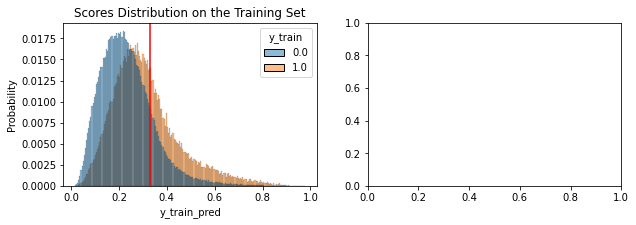

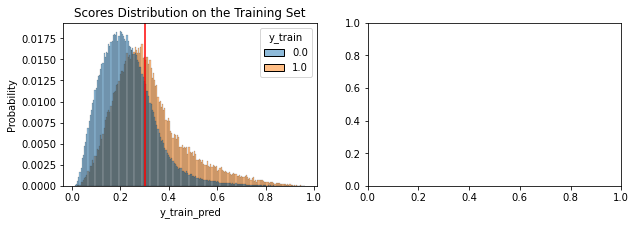

<Figure size 720x216 with 0 Axes>

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}

upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':123,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 10,
        'weight_decay': 0.3,
        'lr': 0.001,
        'eval_metric':'rocauc',
        'patience':3,
        'clip':1,
        'loss_function_weight':None,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':False,
        'continue_training_upstream_model':False,
        'model_saving_path':'./combined_downstream_upstream/models/AF-V1',
        }

trainer(**config)

# V2

Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 0.50903: 100%|██████████| 416/416 [01:40<00:00,  4.13it/s]


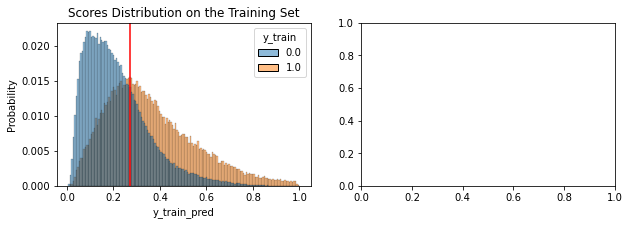

<Figure size 720x216 with 0 Axes>

In [2]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}

upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':123,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 10,
        'weight_decay': 0.3,
        'lr': 0.0005,
        'eval_metric':'rocauc',
        'patience':3,
        'clip':1,
        'loss_function_weight':None,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':False,
        'model_saving_path':'./combined_downstream_upstream/models/AF-V1',
        }

trainer(**config)

# V3

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (training) 0.48603:   6%|▌         | 126/2051 [00:36<09:17,  3.45it/s]


KeyboardInterrupt: 

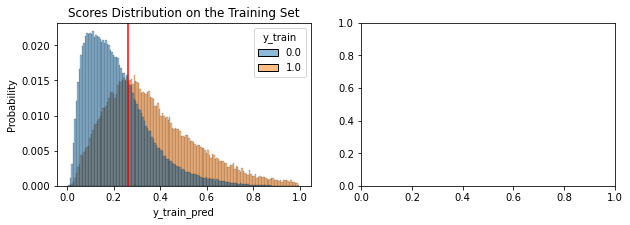

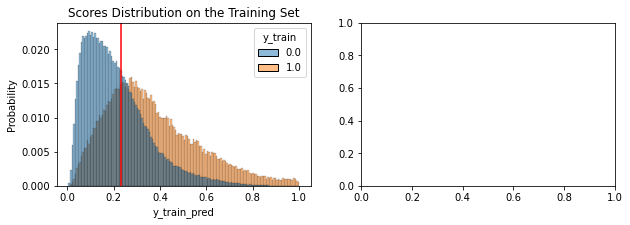

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}

upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':123,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 10,
        'weight_decay': 0.3,
        'lr': 0.0005,
        'eval_metric':'rocauc',
        'patience':3,
        'clip':1,
        'loss_function_weight':None,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':True,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/AF-V3',
        }

trainer(**config)

# V4

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


cuda
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


2246929


Within epoch loss (validation) 0.49568: 100%|██████████| 416/416 [01:40<00:00,  4.15it/s]


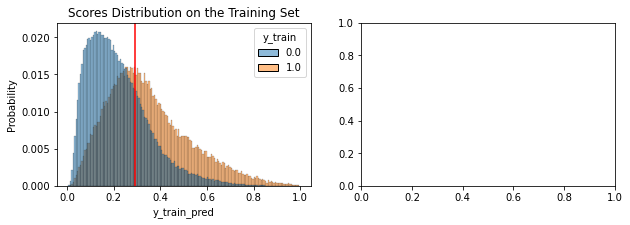

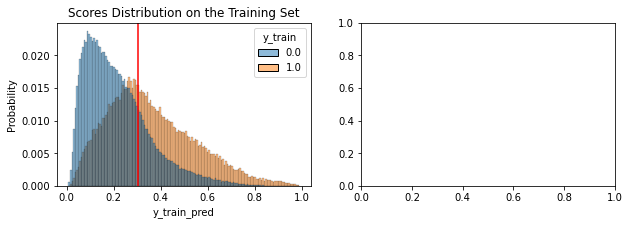

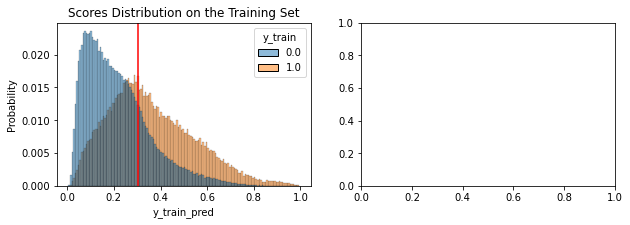

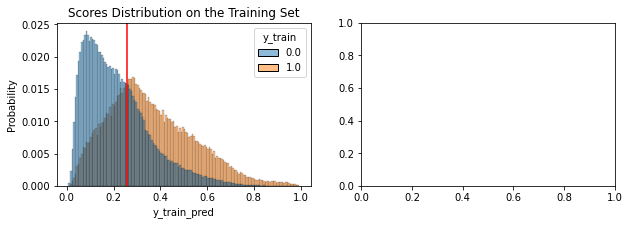

<Figure size 720x216 with 0 Axes>

In [1]:
import os
os.chdir('/home/david/Desktop/projects/thesis/')

from combined_downstream_upstream.utils.LoadModels import *
from combined_downstream_upstream.executors.train_combined_model import trainer


# upstream model params
# ---------------
upstream_params = {
    'input_dimension': 12,
    'output_dimension': 12,              
    'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
    'attention_heads': 8,               # number of attention heads, if None then d_model//64,
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'device':'cuda'
}

upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V9/model_val_rocauc.pt')



config = {
        # general
        'seed':123,
        'metadata_file_path': './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
        'data_folder_path': './downstream_classification/data/individual-signals/',
        'targets': ['AF'],
        'leads': ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'],

        # training
        'batch_size': 128,
        'n_epochs': 10,
        'weight_decay': 0.3,
        'lr': 0.0005,
        'eval_metric':'rocauc',
        'patience':3,
        'clip':1,
        'loss_function_weight':None,

        # Experiment settings
        'upstream_model':upstream_model,
        'downstream_model':downstream_model,
        'impute_only_missing':False,
        'continue_training_upstream_model':True,
        'model_saving_path':'./combined_downstream_upstream/models/AF-V4',
        }

trainer(**config)